In [13]:
import cv2

In [14]:
img=cv2.imread('2.webp')

In [15]:
img.shape

(723, 1444, 3)

In [16]:
img[0]

array([[248, 246, 255],
       [249, 247, 255],
       [247, 245, 255],
       ...,
       [255, 253, 251],
       [246, 242, 241],
       [255, 254, 252]], dtype=uint8)

In [17]:
import matplotlib.pyplot as plt

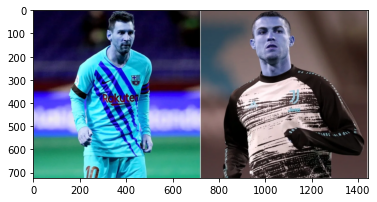

In [18]:
plt.imshow(img)

In [19]:
while True:
    cv2.imshow('result',img)
    if cv2.waitKey(2)==27:
        break
cv2.destroyAllWindows()

In [20]:
haar_data=cv2.CascadeClassifier('data.xml')

In [21]:
haar_data.detectMultiScale(img)

array([[938,  24, 170, 170],
       [336,  49, 127, 127]])

In [22]:
while True:
    faces=haar_data.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),4)
        cv2.imshow('result',img)
    if cv2.waitKey(2)==27:
        break
cv2.destroyAllWindows()

In [29]:
capture=cv2.VideoCapture(0)
data = []
while True:
    flag,img=capture.read()
    if flag:
        faces=haar_data.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),4)
        face=img[y:y+h,x:x+w,:]
        face=cv2.resize(face,(50,50))
        print(len(data))
        if len(data)<600:
            data.append(face)
           
        cv2.imshow('result',img)
    if cv2.waitKey(2)==27 or len(data)>=200:
        break
capture.release()
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [25]:
import numpy as np

In [26]:
np.save('no_mask.npy',data)

In [27]:
np.save('yes_mask.npy',data)